In [202]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import warnings

In [216]:
# SETUP, hier wird alles vorbereitet
warnings.filterwarnings('ignore')

housing_data = pd.read_csv('DatenAusgegeben1.2_UTF8_manuell.csv', sep=";", keep_default_na=False)
print(housing_data.keys())


# Bereinigung und Feature Engeneering

# für €/qm² für besseren Vergleich der Daten
housing_data["Preisproqm"] = housing_data["Preis"]/housing_data["Wohnflaeche in qm"]

# monate seit 2136
housing_data["Monate"] = (housing_data["Verkaufsjahr"]-2136)*12 + housing_data["Verkaufsmonat"] -1

# Werte der Heizungsqualitaet in Zahlen umwandeln
housing_data["Heizungsqualitaet"] = [1 if x=="Schl" else 2 if x=="Ud" else 3 if x=="Ty" else 4 if x=="Gut" else 5 for x in housing_data["Heizungsqualitaet"]]

# Zustand, 1-10 wird auf 1-5 gemapt, das ist zwar ein bisschen ungenauer, aber einfacher zu vergleichen
housing_data["Zustandf"] = [int(x/2) + x%2 for x in housing_data["Zustand"]]

# Alle Zustände werden von 1...X auf 0....X-1 geschoben
housing_data["HeizungsqualitaetN"] = [ x-1 for x in housing_data["Heizungsqualitaet"]]
housing_data["ZustandN"] = [ x-1 for x in housing_data["Zustandf"]]
housing_data["FassadeN"] = [ x-1 for x in housing_data["Zustand Fassade"]]
housing_data["KuecheN"] = [ x-1 for x in housing_data["Kuechenqualitaet"]]

# NA in Garage Typ wird zu "Keine Garage"
housing_data["Garage Typ"] = ['keine Garage' if x=='NA" for x in housing_data["Garage Typ"]]


SyntaxError: invalid syntax (<ipython-input-216-c08e70ce492d>, line 29)

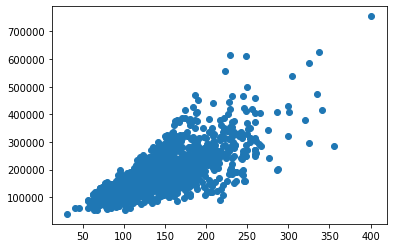

In [4]:
plt.scatter(housing_data["Wohnflaeche in qm"],housing_data["Preis"])
# Hierfür Lineare Regression!

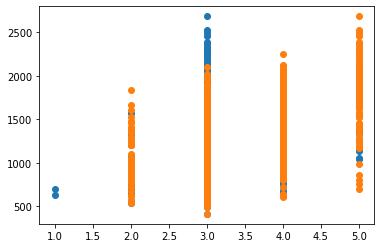

In [35]:
plt.scatter(housing_data["Zustand Fassade"],housing_data["Preis"]/housing_data["Wohnflaeche in qm"])
plt.scatter(housing_data["Kuechenqualitaet"],housing_data["Preis"]/housing_data["Wohnflaeche in qm"])


In [18]:
housing_data.keys()

Index(['Grundstueck in qm', 'Grundstuecksform', 'Steigung', 'Bezirk', 'Zone',
       'Lage', 'Typ', 'Zustand', 'Gebaut', 'Renoviert', 'Zustand Fassade',
       'Kellerflaeche in qm', 'Heizung', 'Heizungsqualitaet', 'Klimaanlage',
       'Erster Stock in qm', 'Zweiter Stock in qm', 'Wohnflaeche in qm',
       'Schlafzimmer', 'Kuechen', 'Kuechenqualitaet', 'Raeume', 'Garage Typ',
       'Garagenkapazitaet', 'Pool', 'Verkaufsmonat', 'Verkaufsjahr', 'Preis'],
      dtype='object')

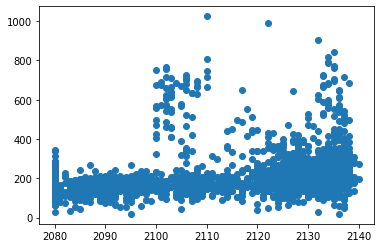

In [19]:
plt.scatter(housing_data["Renoviert"],housing_data["Preis"]/housing_data["Grundstueck in qm"])

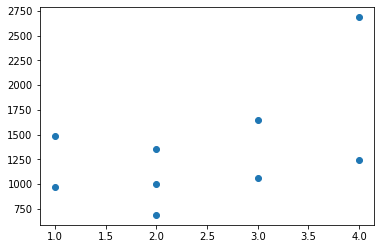

In [47]:
plt.scatter(housing_data["Pool"],housing_data["Preis"]/housing_data["Wohnflaeche in qm"])


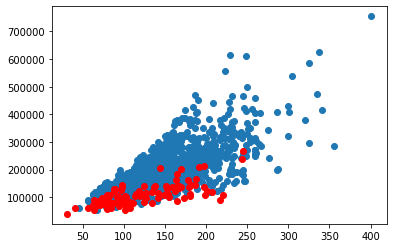

In [54]:
#Klimaanlage
house_ac = housing_data[housing_data.Klimaanlage == "Y"]
house_not_ac = housing_data[housing_data.Klimaanlage == "N"]
plt.scatter(house_ac["Wohnflaeche in qm"],house_ac["Preis"])
plt.scatter(house_not_merac["Wohnflaeche in qm"],house_not_ac["Preis"],c="red")


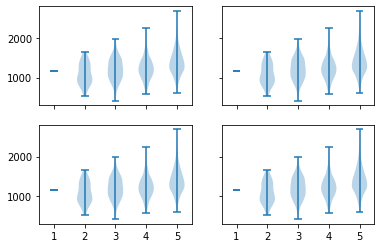

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f1b994bc610>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f1b994bc430>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f1b994c8790>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f1b994c8b50>}

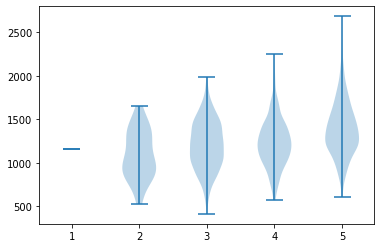

In [175]:
# Florian:
# Heizung, Heizungsqualitaet, Erster Stock in qm, Zweiter Stock in qm, Wohnflaeche in qm, Schlafzimmer, Kuechen, Kuechenqualität, Räume, Garage Typ, Garagenkapazitt, Verkaufsmonat, Verkaufsjahr, Preis
# untersuchen

# Heizung + Qualitaet
heater_types = housing_data["Heizung"].unique()
heater_quality = np.sort(housing_data["Heizungsqualitaet"].unique())
heater_data = [None]*(len(heater_types)+1)

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)

for i in range(len(heater_types)):
    for l in range(len(heater_quality)):
        heater_data[l] = housing_data[housing_data["Heizungsqualitaet"] == heater_quality[l]]["Preisproqm"]
    axs[int(i/2),i%2].violinplot(heater_data)
    
# wie man sehen kann, gibt es nur für die Klimaanlage genügend Werte
# Auch hat die Qualität der Heizung nur bei Klimaanlagen annähernd einen Einfluss
plt.show()

for l in range(len(heater_quality)):
    heater_data[l] = housing_data[housing_data["Heizungsqualitaet"] == heater_quality[l]]["Preisproqm"]
plt.violinplot(heater_data, heater_quality)
# Auch der Überblick nur über die Heizungsqualitaet hat keinen großen Einfluss auf den €/m²

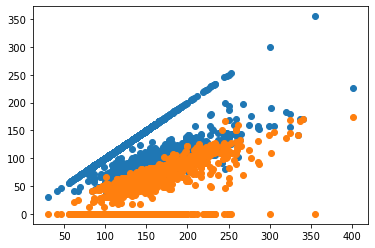

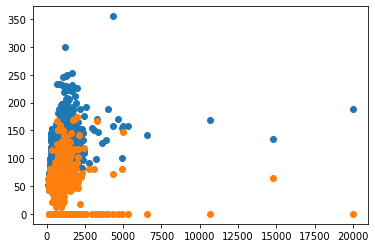

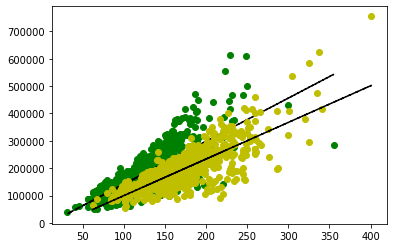

In [157]:
# Erster Stock in qm, Zweiter Stock in qm, Wohnflaeche in qm
# Daten für uns unwichtig, es wird nur kurz darüber geschaut, ob Anomalien und interessante Sachen auftreten

plt.scatter(housing_data["Wohnflaeche in qm"], housing_data["Erster Stock in qm"])
plt.scatter(housing_data["Wohnflaeche in qm"], housing_data["Zweiter Stock in qm"])
plt.show()
# Wie zu erwarten sieht man nicht viel, es gibt sehr viele einstöckige Häuser

plt.scatter(housing_data["Grundstueck in qm"], housing_data["Erster Stock in qm"])
plt.scatter(housing_data["Grundstueck in qm"], housing_data["Zweiter Stock in qm"])
plt.show()

one_floor = housing_data[housing_data["Zweiter Stock in qm"] == 0 ]
two_floors = housing_data[housing_data["Zweiter Stock in qm"] != 0 ]


coef = np.polyfit(one_floor["Wohnflaeche in qm"],one_floor["Preis"],1)
poly1d_fn = np.poly1d(coef) 

coef1 = np.polyfit(two_floors["Wohnflaeche in qm"],two_floors["Preis"],1)
poly1d_fn1 = np.poly1d(coef1) 


plt.plot(one_floor["Wohnflaeche in qm"], one_floor["Preis"], 'go', one_floor["Wohnflaeche in qm"], poly1d_fn(one_floor["Wohnflaeche in qm"]), '--k')
plt.plot(two_floors["Wohnflaeche in qm"], two_floors["Preis"], 'yo', two_floors["Wohnflaeche in qm"], poly1d_fn1(two_floors["Wohnflaeche in qm"]), '--k')

plt.show()

# Wohnungen mit mehreren Stockwerken sind bei gleicher Wohnfläche durchweg billiger

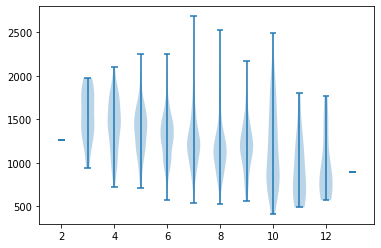

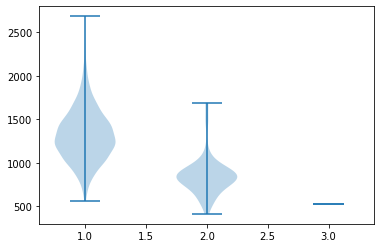

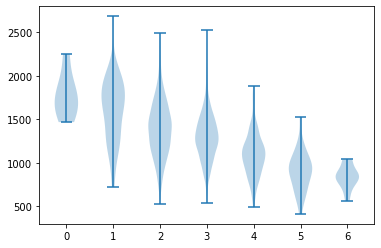

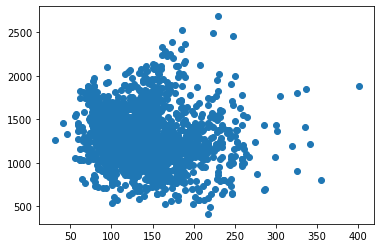

In [172]:
# Schlafzimmer, Kuechen, Räume

# idee: je mehr Räume im Vergleich zu Wohnfläche -> billiger

rooms = np.sort(housing_data["Raeume"].unique())
room_data = [None]*len(rooms)
for i in range(len(rooms)):
    room_data[i] = housing_data[housing_data["Raeume"] == rooms[i]]["Preisproqm"]


plt.violinplot(room_data, rooms)
plt.show()
# ideale Raumzahl liegt bei 7/8 Raeumen

kitchens = np.sort(housing_data["Kuechen"].unique())
kitchen_data = [None]*len(kitchens)
for i in range(len(kitchens)):
    kitchen_data[i] = housing_data[housing_data["Kuechen"] == kitchens[i]]["Preisproqm"]

plt.violinplot(kitchen_data, kitchens)
plt.show()
# Die Anzahl der Kuechen haben wohl keinen Einfluss, oder 1 Kueche > 2?


bedrooms = np.sort(housing_data["Schlafzimmer"].unique())
bedroom_data = [None]*len(bedrooms)
for i in range(len(bedrooms)):
    bedroom_data[i] = housing_data[housing_data["Schlafzimmer"] == bedrooms[i]]["Preisproqm"]

plt.violinplot(bedroom_data, bedrooms)
plt.show()
# Die Anzahl der Schlafzimmer ist komisch, 1 Schlafzimmer ist am beliebtesten? Vllt sind sehr kleine Wohnflächen teurerer als im Vergleich?
plt.scatter(housing_data["Wohnflaeche in qm"],housing_data["Preisproqm"])
# Schwer zu sagen, wahrscheinlich aber nicht


# TODO: Anzahl Raum vs Wohnfläche -> Raumgröße?
# Raumgröße vs. Preis??


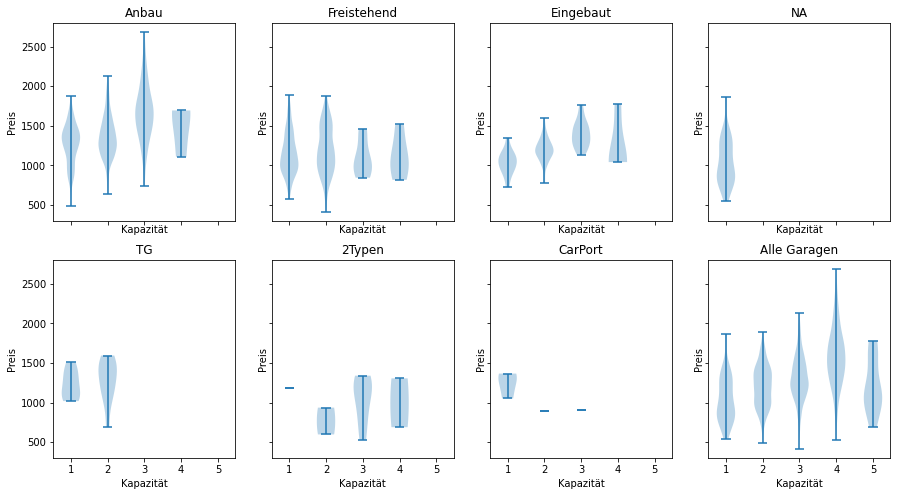

In [206]:
#Garage Typ, Garagenkapazitaet
# wahrscheinlich -> mehr Garagen -> teurer?

garage_types = housing_data["Garage Typ"].unique()


fig, axs = plt.subplots(2, 4, sharex=True, sharey=True, figsize=(15,8))

for i in range(len(garage_types)):
    type_data = housing_data[housing_data["Garage Typ"] == garage_types[i]]
    garage_capacity = np.sort(type_data["Garagenkapazitaet"].unique())
    garage_data = [0]*(len(garage_capacity))
    for l in range(len(garage_capacity)):
        garage_data[l] = type_data[housing_data["Garagenkapazitaet"] == garage_capacity[l]]["Preisproqm"]
    axs[int(i/4),i%4].violinplot(garage_data)
    axs[int(i/4),i%4].set_title(garage_types[i])
    axs[int(i/4),i%4].set_xlabel("Kapazität")
    axs[int(i/4),i%4].set_ylabel("Preis")
    
# Anbaugaragen sind mitunter am teuersten, wobei die anderen im €/qm Bereich sind, wie, wenn keine Garage vorhanden ist
# Der Einfluss von Garagen auf den Preis ist nicht signifikant

garage_capacity = np.sort(housing_data["Garagenkapazitaet"].unique())
garage_data = [0]*(len(garage_capacity))
for i in range(len(garage_capacity)):
    garage_data[i] = housing_data[housing_data["Garagenkapazitaet"] == garage_capacity[i]]["Preisproqm"]
    
axs[1,3].violinplot(garage_data)
axs[1,3].set_title("Alle Garagen")
axs[1,3].set_xlabel("Kapazität")
axs[1,3].set_ylabel("Preis")
plt.show()
# Auch der Überblick nur über die Garagenkapazitaet hat keinen großen Einfluss auf den €/m²


# NA 1 entspricht Alle Garagen 1: > X muss von 0 - 4 Gehen!

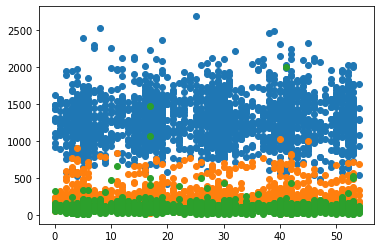

In [211]:
# Verkaufsmonat, Verkaufsjahr, Preis
# Verkaufsmonat sollte weniger einfluss auf den Preis haben
# Verkaufsjahr sollte einen Anstieg wegen der Erhöhung der Mietpreise aufzeigen


plt.scatter(housing_data["Monate"],housing_data["Preisproqm"])
plt.scatter(housing_data["Monate"],housing_data["Preis"]/housing_data["Grundstueck in qm"])
plt.scatter(housing_data["Monate"],housing_data["Grundstueck in qm"]/10)


plt.show()
# es gibt keinen Anstieg zwischen den Jahren
# Es werden teurere Wohnungen in den Sommermonaten verkauft, auch deutlich mehr
# TODO in 2x2 Matrix!
# Lin reg für Entwicklung von Preis!

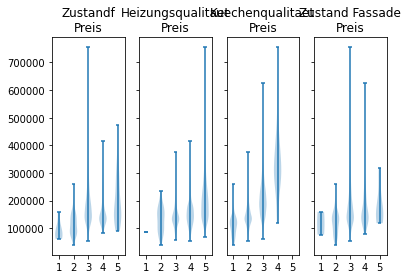

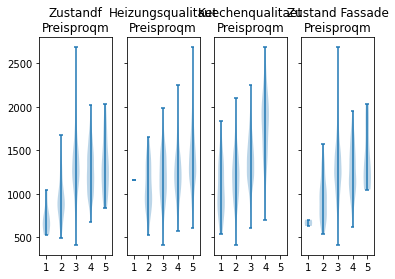

In [5]:
# Heizungsqualitaet, Kuechnqualitaet, Fassadenqualitaet und Zustand 
# (Zustandf, damit ein Vergleich einfacher moeglich ist)


keys = ["Zustandf", "Heizungsqualitaet", "Kuechenqualitaet", "Zustand Fassade"]
rows = ["Preis", "Preisproqm"]

for f in range(len(rows)):
    fig, axs = plt.subplots(1, len(keys), sharex=True, sharey=True)
    for x in range(len(keys)):
        quality = np.sort(housing_data[keys[x]].unique())
        data = [None]*len(quality)
        for i in range(len(quality)):
            data[i] = housing_data[housing_data[keys[x]] == quality[i]][rows[f]]
        axs[x].violinplot(data)
        axs[x].set_title(str(keys[x] + "\n" + rows[f]))
        axs[x].set_xticks([1,2,3,4,5])
    plt.show()
    
    
    # Man kann einige preisliche Anstiege sehen, besonders bei der Kuechenqualität vs Preis
    # da ist wohl nur das Problem, dass der rest der Wohnung wohl auch luxurioeser wird und 
    # das für die Arbeit NICHT gewollt ist, ( es soll Geld mit einzelnen, wenn auch mehreren Renovationen gemacht werden
    # nicht mit einem Umbau in ein neues Haus!)
    # hier sehen wir mehrere Ausreisser bei dem Verkaufspreis, diese sind aber für die weitere Arbeit nicht sehr wichtig, 
    # da es genug weitere Datenpunkte gibt.

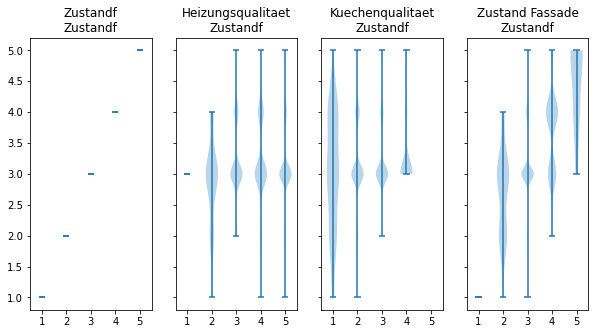

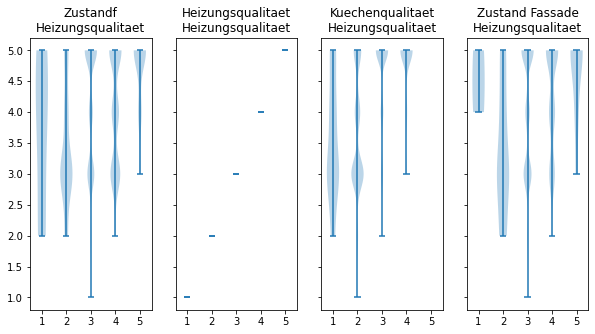

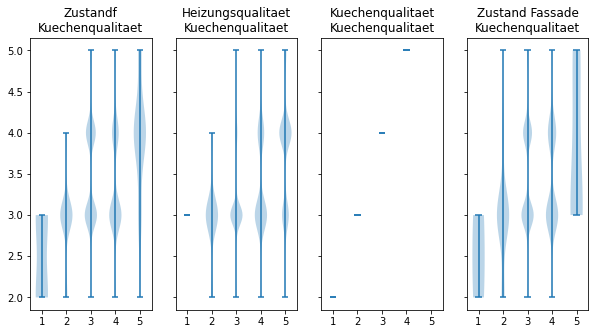

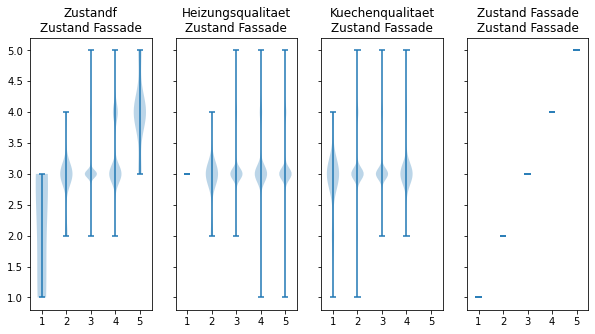

In [46]:
# Schauen, ob und wie Qualitätskriterien miteinander in Beziehung stehen
# UNTEN BESSER
keys = ["Zustandf", "Heizungsqualitaet", "Kuechenqualitaet", "Zustand Fassade"]
rows = ["Zustandf", "Heizungsqualitaet", "Kuechenqualitaet", "Zustand Fassade"]

for f in range(len(rows)):
    fig, axs = plt.subplots(1, len(keys), sharex=True, sharey=True, figsize=(10,5))
    for x in range(len(keys)):
        quality = np.sort(housing_data[keys[x]].unique())
        data = [None]*len(quality)
        for i in range(len(quality)):
            data[i] = housing_data[housing_data[keys[x]] == quality[i]][rows[f]]
        axs[x].violinplot(data)
        axs[x].set_title(str(keys[x] + "\n" + rows[f]))
        axs[x].set_xticks([1,2,3,4,5])
    plt.show()
    


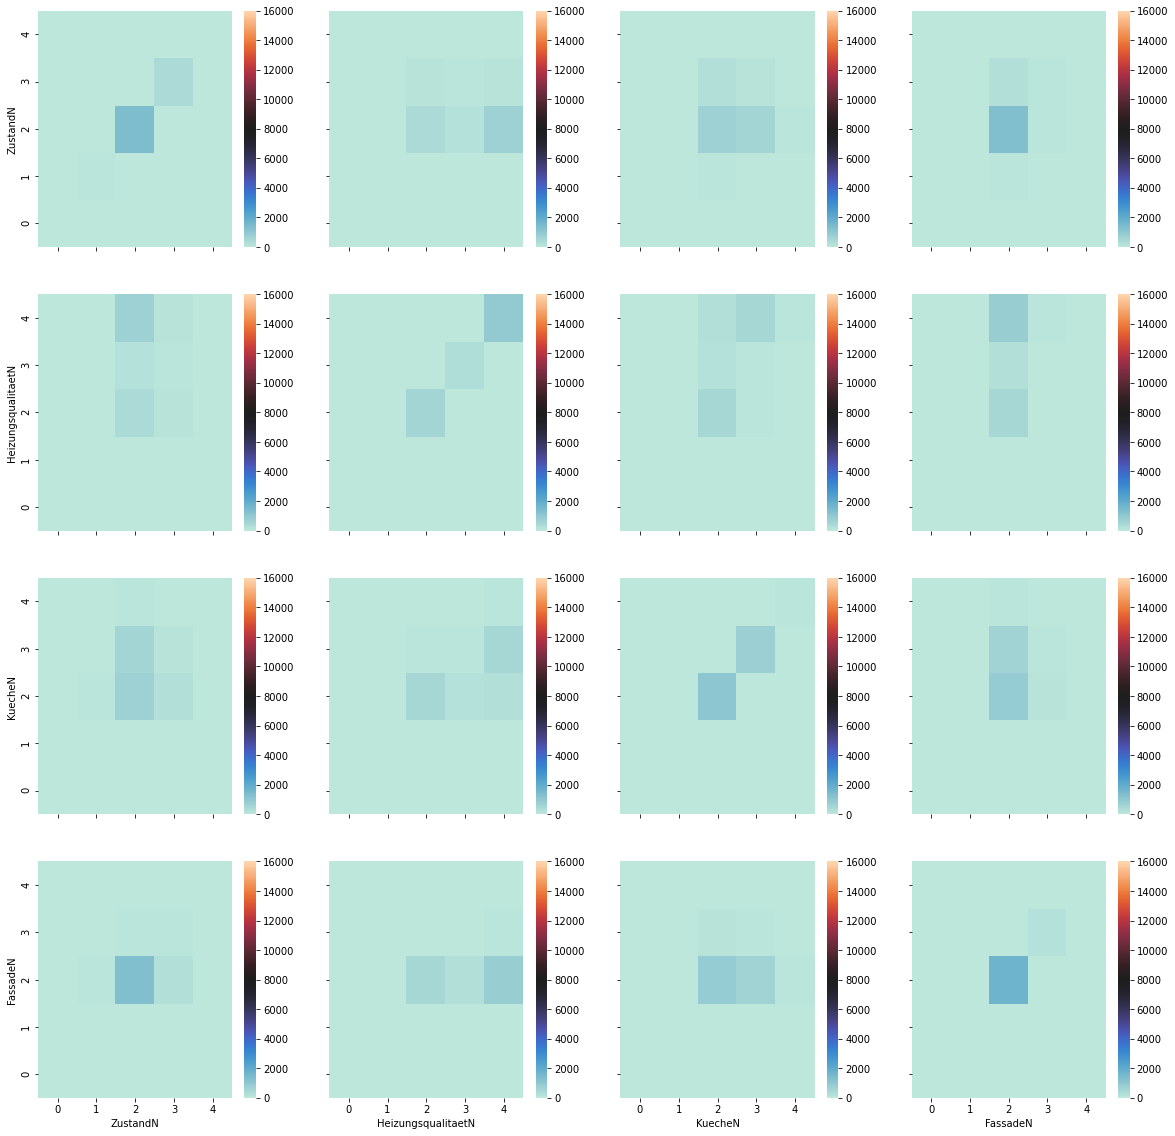

In [214]:
# Daten vorbereiten für heatmap: im Besten Fall sollte eine Diagonale von Links unten -> rechts oben gehen
# Achtung Rechenintensiv!
keys = ["ZustandN", "HeizungsqualitaetN", "KuecheN", "FassadeN"]


fig, axs = plt.subplots(len(keys), len(keys), sharex=True, sharey=True, figsize=(20,20))

# Zweimal über Keys iterieren -> key1 X key2 Plots (key1 == key2)
# für jeden Plot alle Möglichen Werte von key1 heraussuchen -> X-Achse
# für jeden möglichen X-Wert alle Y-Werte von key2 in data schreiben
# happy plotting
for i in range(len(keys)):
    values = [0,1,2,3,4]
    for l in range(len(keys)):
        
        data = [None]*len(values)
        for f in range(len(values)):
            data[f] = [0]*len(values)
        data[1][1] = 2
        for value in values:
            raw_data = housing_data[housing_data[keys[i]] == value][keys[l]]
            unique, counts = np.unique(raw_data, return_counts=True)
            count = dict(zip(unique, counts))
            for key in count.keys():
                # Es tut mir ja leid
                data[value][key] = count[key]
        sb.heatmap(data, ax = axs[i,l]) #vmin=0, vmax=16000, center=8000
        axs[i,l].invert_yaxis()
        if i == len(keys)-1:
            axs[i,l].set_xlabel(str(keys[l]))
        if l == 0:
            axs[i,l].set_ylabel(str(keys[i]))
    
# Es existieren nur relativ wenige wirklich Schlechte zustände, auch stehen sie nur wenig in Korrelation
# im oberen x- und y- Bereich gibt es Bessere Korrelationen, so sind in einem Bereich positiv (2+) bewertete
# auch in den anderen Bereichen positiv. Die charakteristischen Diagonalen, wie man sie bei starken Korrelationen
# sieht, sind aber hier nicht wirklich vorhanden

# Stimmt das was ich gemacht habe?
# ist eine Heatmap gleich Korrelation??von 